# Players Stats -- Data Cleaning
Pierre-Antoine MAHE ---- June 2020

## Table of contents

* [Introduction](#introduction)
* [Loading Data](#loading)
* [Data Points in Players DB](#datapoints)
* [Correlation matrix](#correlation)

## 1. Introduction <a name="introduction"></a>

## 2. Loading Data <a name="loading"></a>

In [42]:
# Data Wrangling
import pandas as pd
import numpy as np

# DB connection
import sqlite3

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [43]:
conn = sqlite3.connect('../../CSGOscraper/data/hltv.db')
players_df = pd.read_sql("""SELECT * FROM players_stats""", conn)
players_df.head()

,player_ref,player_name,rating_1,rating_2,impact,deaths_per_round,kast,average_damage_per_round,kills_per_round,total_kills,...,opening_kill_ratio,team_win_percent_after_first_kill,first_kill_in_won_rounds,rifle_kills,sniper_kills,smg_kills,pistol_kills,grenade_kills,other_kills,maps_won
0,11893,ZywOo,1.29,1.35,1.50,0.62,0.748,90.4,0.87,14311,...,1.60,0.731,0.220,5107,5306,788,2851,165,116,0.606
1,39,GeT_RiGhT,1.10,NaN,1.03,0.64,0.691,76.8,0.74,32012,...,1.08,0.762,0.140,23226,878,2125,4816,443,541,0.616
2,13281,El1an,1.10,1.13,1.19,0.64,0.689,76.3,0.74,11540,...,1.44,0.721,0.196,2077,7076,234,2025,72,70,0.458
3,5021,swag,1.10,NaN,1.09,0.62,0.729,77.6,0.73,10527,...,1.20,0.757,0.136,6649,1365,447,1847,171,69,0.606
4,1378,zehN,1.10,NaN,1.13,0.65,0.716,80.9,0.74,16421,...,1.07,0.761,0.131,11566,471,1285,2698,355,61,0.586


#### We have a few columns here, let's work out the details :

In [44]:
players_df.columns

Index(['player_ref', 'player_name', 'rating_1', 'rating_2', 'impact',
       'deaths_per_round', 'kast', 'average_damage_per_round',
       'kills_per_round', 'total_kills', 'total_deaths', 'headshot_percent',
       'kd_ratio', 'grenade_damage_per_round', 'maps_played', 'rounds_played',
       'assists_per_round', 'saved_by_teammate_per_round',
       'saved_a_teammate_per_round', 'rounds_with_kills',
       'kill_death_difference', 'rounds_0_kill', 'rounds_1_kill',
       'rounds_2_kill', 'rounds_3_kill', 'rounds_4_kill', 'rounds_5_kill',
       'total_opening_kills', 'total_opening_deaths', 'opening_kill_ratio',
       'team_win_percent_after_first_kill', 'first_kill_in_won_rounds',
       'rifle_kills', 'sniper_kills', 'smg_kills', 'pistol_kills',
       'grenade_kills', 'other_kills', 'maps_won'],
      dtype='object')

## 3. Data Points in Players Db : <a name="datapoints"></a>

There are quite a few datapoints in the players statistics database, below we list them with a quick explanation

--------------------------------------------------------------------------------

### Player Metadata


* **player_ref** : reference number of the player on the hltv website.
* **player_name** : player's pseudonym.


* **rating_1** : a number computed by hltv "telling us if the player put up above or below average numbers, with 1.00 being the average.
* **rating_2** : improvement on rating_1 (see https://www.hltv.org/news/20695/introducing-rating-20 for details).
* **impact** : another hltv metric that measures the impact made from multikills, opening kills, and clutches.

--------------------------------------------------------------------------------

### Overall Statistics


* **maps_played** : total number of played maps recorded.
* **maps_won** : total number of recorded maps won.
* **rounds_played** : total number of played rounds recorded.
* **round_with_kills** : total number of rounds when the player had at least a kill.


* **total_kills** : total number of kills recorded.
* **total_deaths** : total number of deaths recorded.
* **kill_death_difference** : difference between **total_kills** and **total_deaths**.
* **kd_ratio** : ratio of **total_kills** and **total_deaths**.


* **rounds_X_kill**: number of rounds when the player had X (0, 1, 2, 3, 4 or 5) kills.


* **total_opening_kills** : total number of opening kills (the player was the first of all 10 players to kill an enemy during the round).
* **total_opening_deaths** : total number of opening deaths (the player was the first of all 10 players to die).
* **opening_kill_ratio** : ratio of the last two statistics.

--------------------------------------------------------------------------------

### Average Statistics


* **kills_per_round** : ratio of **total_kills** over **rounds_played**.
* **deaths_per_round** : ratio of **total_deaths** over **rounds_played**.
* **assists_per_round** : number of assists per round. To get an assist, the player need to do at least 41 damage (out of100), then the enemy needs to die. This doesn't take into account flash assists or else, only damage.


* **average_damage_per_round** : average damage dealt by the player per round.
* **grenade_damage_per_round** : average damage dealt by the player per round with grenades.
* **headshot_percent** : number of kills where the last bullet was a headshot.
* **kast** : percentage of rounds in which the player either had a kill, assist, survived or was traded.

--------------------------------------------------------------------------------

### Specific Statistics


* **team_win_percent_after_first_kill**: percentage of rounds won by the player's team after the player took the first kill
* **first_kill_in_won_rounds**: percentage of rounds where the player took the first kill and the player's team won


* **saved_by_teammate_per_round** : number of times the player has been saved by a teammate per round (to save a teammate you need to kill the attacker that was damaging an ally within 1 seconds of his last attack). Data from 2016 and onward only.
* **saved_a_teammate_per_round** : number of times the player has saved a teammate per round. Data from 2016 and onward only.

--------------------------------------------------------------------------------

### Weapon Statistics


* **weapons_kills** : numbers of kills performed with the specified weapon (rifle, sniper, smg, pistol, grenade or other).

## 4. Correlation matrix <a name=correlation></a>

We will first reorganize the columns to make the correlation matrix readable.

In [46]:
print(players_df.shape)

reordered_columns = ['player_ref', 'player_name', 'rating_1', 'rating_2', 'impact', 'maps_played', 'maps_won',
                    'rounds_played', 'rounds_with_kills', 'total_kills', 'total_deaths', 'kill_death_difference',
                    'kd_ratio', 'rounds_0_kill', 'rounds_1_kill', 'rounds_2_kill', 'rounds_3_kill', 
                    'rounds_4_kill', 'rounds_5_kill', 'total_opening_kills', 'total_opening_deaths',
                    'opening_kill_ratio', 'kills_per_round', 'deaths_per_round', 'assists_per_round',
                    'average_damage_per_round', 'grenade_damage_per_round', 'headshot_percent', 'kast',
                    'team_win_percent_after_first_kill', 'first_kill_in_won_rounds',
                    'saved_by_teammate_per_round', 'saved_a_teammate_per_round', 'rifle_kills', 'sniper_kills',
                    'smg_kills', 'pistol_kills', 'grenade_kills', 'other_kills']

players_df = players_df[reordered_columns]

print(players_df.shape)

(721, 39)
(721, 39)


We alredy know, from the datapoints description above, that a some of them are going to be highly correlated or are based on each other. An obvious example will be  

- **total_kills** and **total_deaths** vs **kd_ratio** or **kill_death_difference**

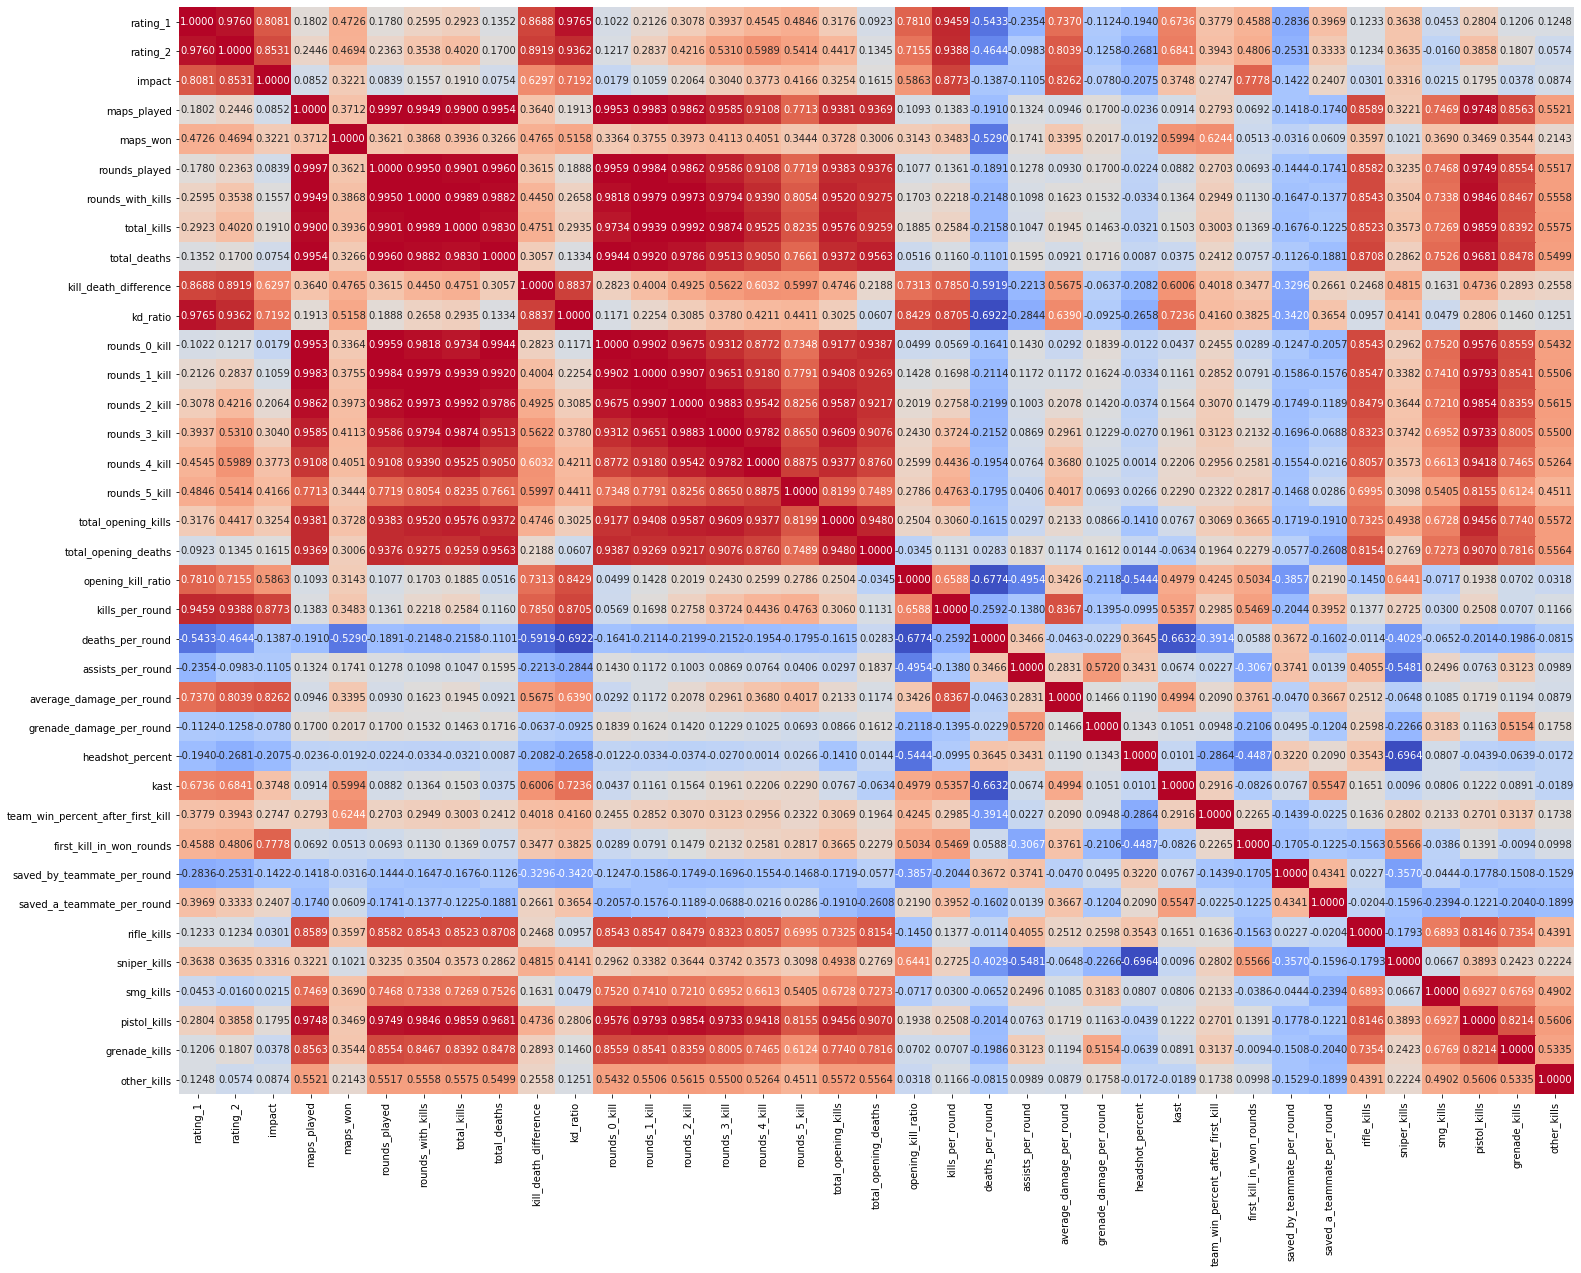

In [47]:
fig, ax = plt.subplots(figsize=(25,20))
sns.heatmap(players_df.corr(method='pearson'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)

ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('players_stats_corrmatrix_1.png', bbox_inches='tight', pad_inches=0.0)

Let's save the current dataframe before doing more work on it

In [48]:
players_df.to_csv('../data/all_players_stats.csv')

With the reordered columns, the correlation matrix show 'blocks' of high pearson coefficient values.


But not all of them are true correlations and are only due to the fact that some datapoints are incremented (don't know a better word for that) instead of averaged. This is the case of, for example, **rounds_4_kill** and **total_opening_deaths** with a coefficient r = 0.8760.

Incremented statistics are the following :

- rounds_with_kills
- rounds_X_kills
- total_opening_kills and total_opening_deaths
- weapon_kills

Let's try to average those values and replot the matrix :

In [49]:
players_df.drop(['player_ref', 'player_name', 'rating_1', 'rating_2', 'impact'], axis=1, inplace=True)

In [50]:
players_df['rounds_with_kills'] = players_df['rounds_with_kills'] / players_df['rounds_played']

players_df['rounds_0_kill'] = players_df['rounds_0_kill'] / players_df['rounds_played']
players_df['rounds_1_kill'] = players_df['rounds_1_kill'] / players_df['rounds_played']
players_df['rounds_2_kill'] = players_df['rounds_2_kill'] / players_df['rounds_played']
players_df['rounds_3_kill'] = players_df['rounds_3_kill'] / players_df['rounds_played']
players_df['rounds_4_kill'] = players_df['rounds_4_kill'] / players_df['rounds_played']
players_df['rounds_5_kill'] = players_df['rounds_5_kill'] / players_df['rounds_played']

# Total opening kills and deaths need to be put in regards to the number of rounds played
# As one or the other can only happens one time per round
players_df['total_opening_kills']  = players_df['total_opening_kills']  / players_df['rounds_played']
players_df['total_opening_deaths'] = players_df['total_opening_deaths'] / players_df['rounds_played']

players_df['rifle_kills']   = players_df['rifle_kills']   / players_df['total_kills']
players_df['sniper_kills']  = players_df['sniper_kills']  / players_df['total_kills']
players_df['smg_kills']     = players_df['smg_kills']     / players_df['total_kills']
players_df['pistol_kills']  = players_df['pistol_kills']  / players_df['total_kills']
players_df['grenade_kills'] = players_df['grenade_kills'] / players_df['total_kills']
players_df['other_kills']   = players_df['other_kills']   / players_df['total_kills']

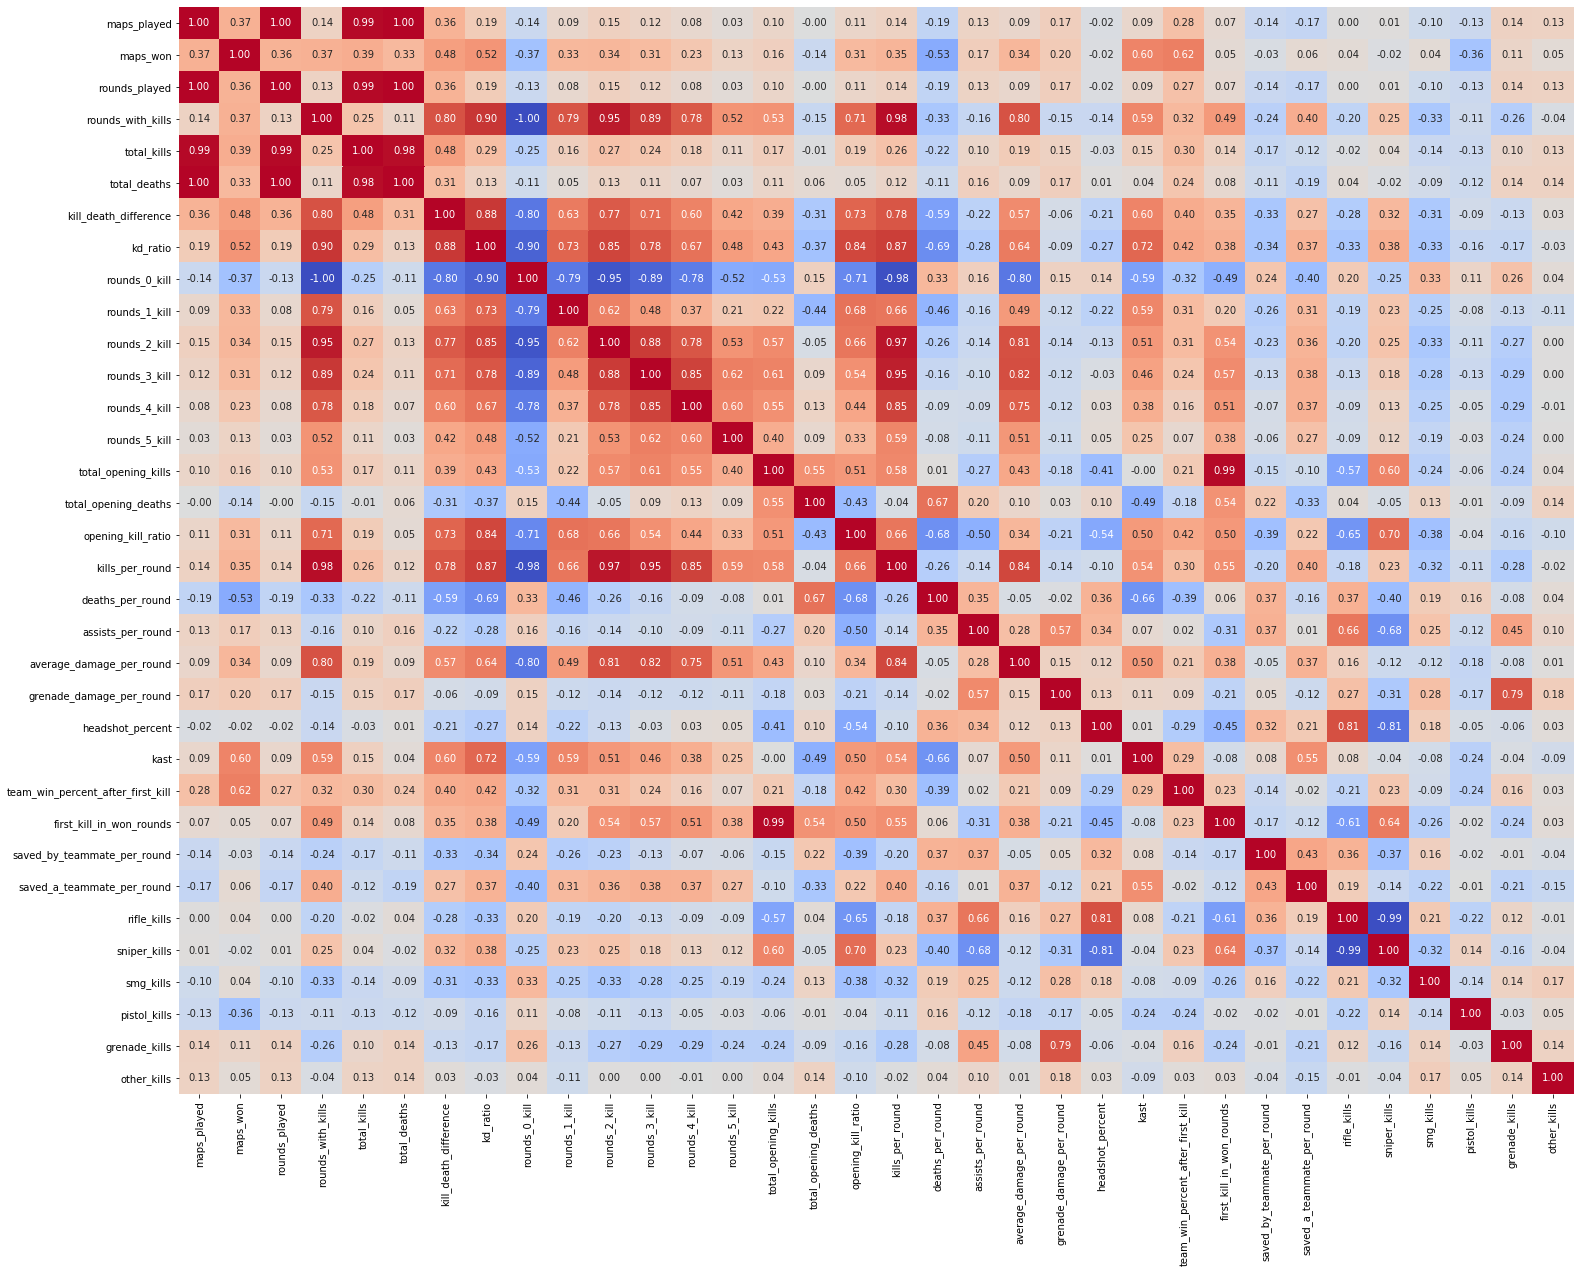

In [51]:
fig, ax = plt.subplots(figsize=(25,20))
sns.heatmap(players_df.corr(method='pearson'), annot=True, fmt='.2f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)

ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('players_stats_corrmatrix_2.png', bbox_inches='tight', pad_inches=0.0)

We can see that the last incremented data points are the ones with the higher correlation between them, i.e. :
- **maps_played**
- **rounds_played**
- **total_kills**
- **total_deaths**
    
Let's remove them for now

In [52]:
players_df.drop(['maps_played', 'rounds_played', 'total_kills', 'total_deaths'], axis=1, inplace=True)

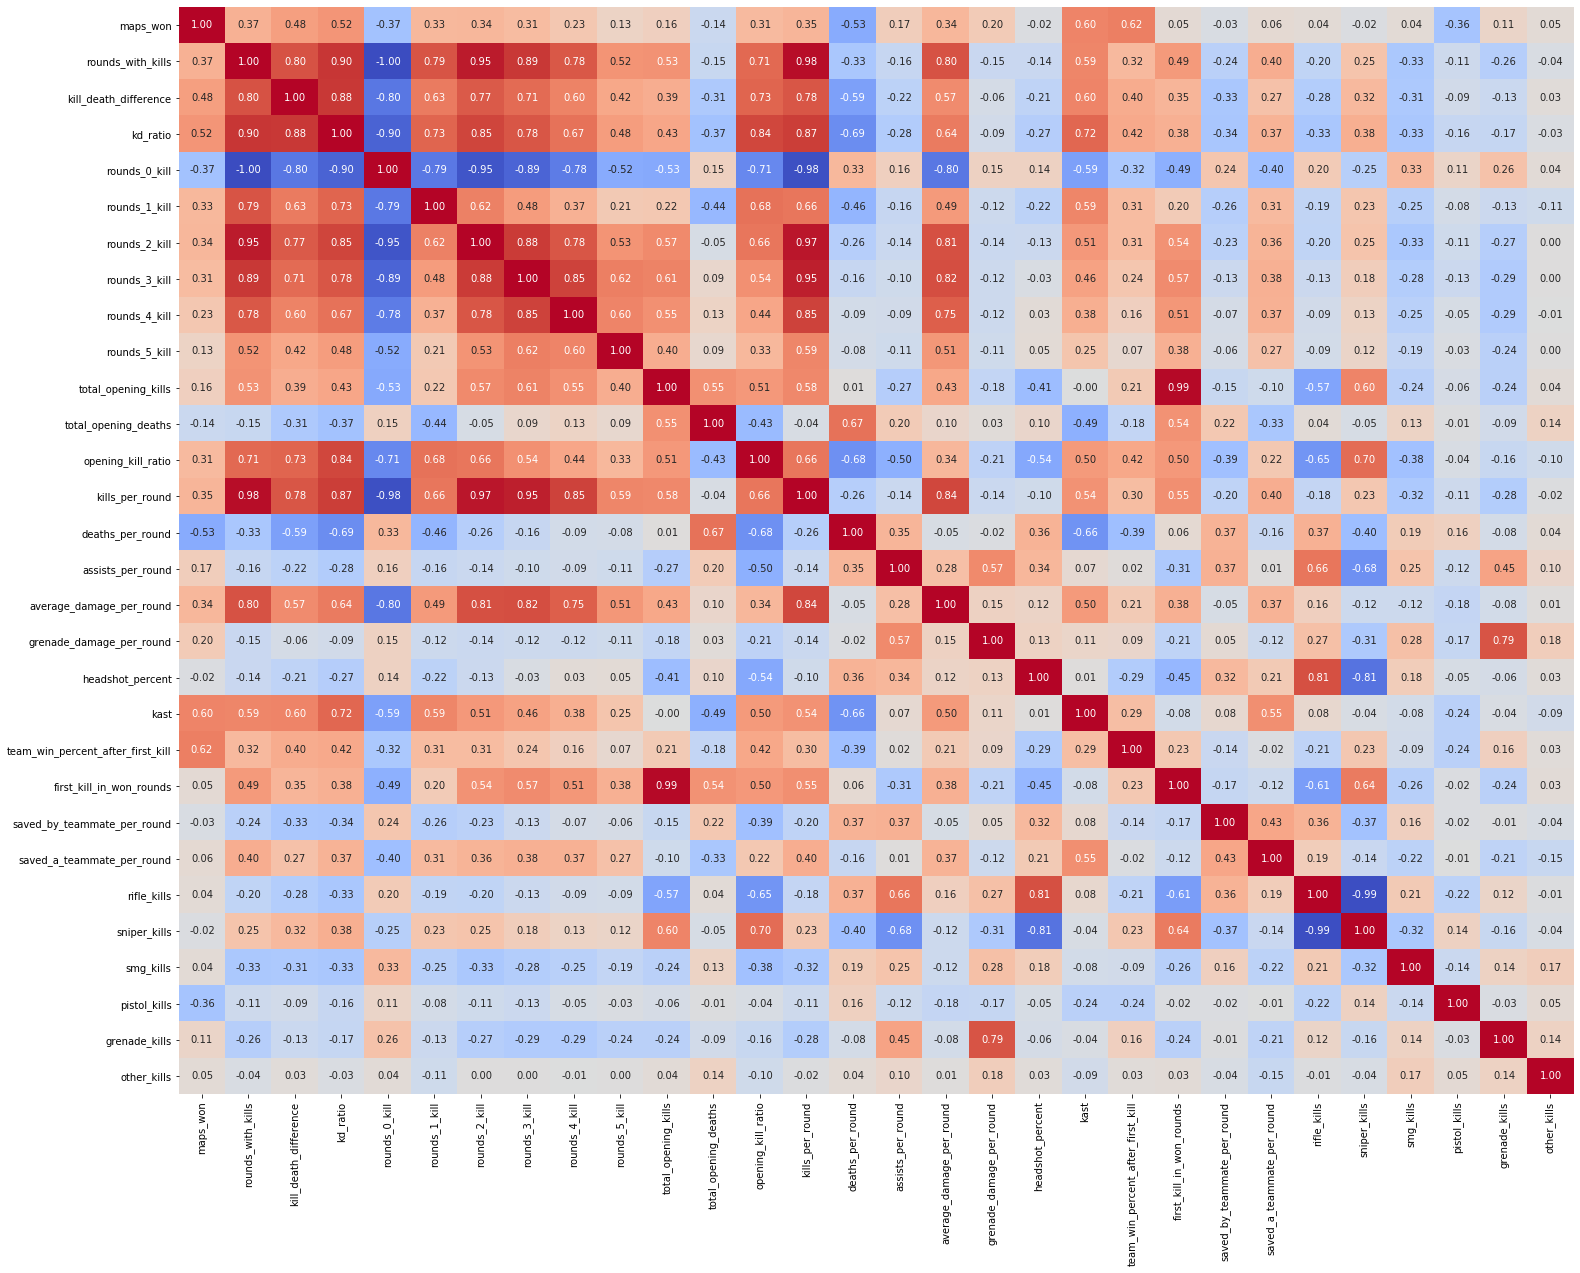

In [53]:
fig, ax = plt.subplots(figsize=(25,20))
sns.heatmap(players_df.corr(method='pearson'), annot=True, fmt='.2f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)

ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('players_stats_corrmatrix_3.png', bbox_inches='tight', pad_inches=0.0)

Let's first study the correlation between the 'weapons_kills' datapoints and the rest, as they're not as much to say about them but there is a few intersting values.

**other_kills** : knife, shotguns or environment kills. No correlations with any other datapoints whatsoever. This is because those type of kills are either lucky ones (a knife kill is rare and risky) or outside of the meta (like most shotguns)

**grenade_kills**

- small inverse correlation (-0.1 to -0.3) with **rounds_X_kills**, **total_opening_deaths** and **total_opening_kills**, **kills_per_round** and **opening_kill_ratio**

